# Linear Regression evaluation

The first model that we are going to evaluate is linear regression

We are going to use California house-prices dataset from Scikit-learn, data description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)  



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Loading the data as a dataframe to do some EDA first

In [2]:
data = datasets.fetch_california_housing(as_frame=True)


In [3]:
housing = data.frame
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


We can see that we have 20640 instances and 8 features plus the target value.

# Exploratory Data Analysis  

1. Check for missing values

In [4]:
housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No missing values.


2. Basic statistical data

In [5]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


3. Check for outliers

Looks like we have some outliers in AveBedrms, AveRooms, AveOccup, those max values seem weird, but to be sure we should do boxplots


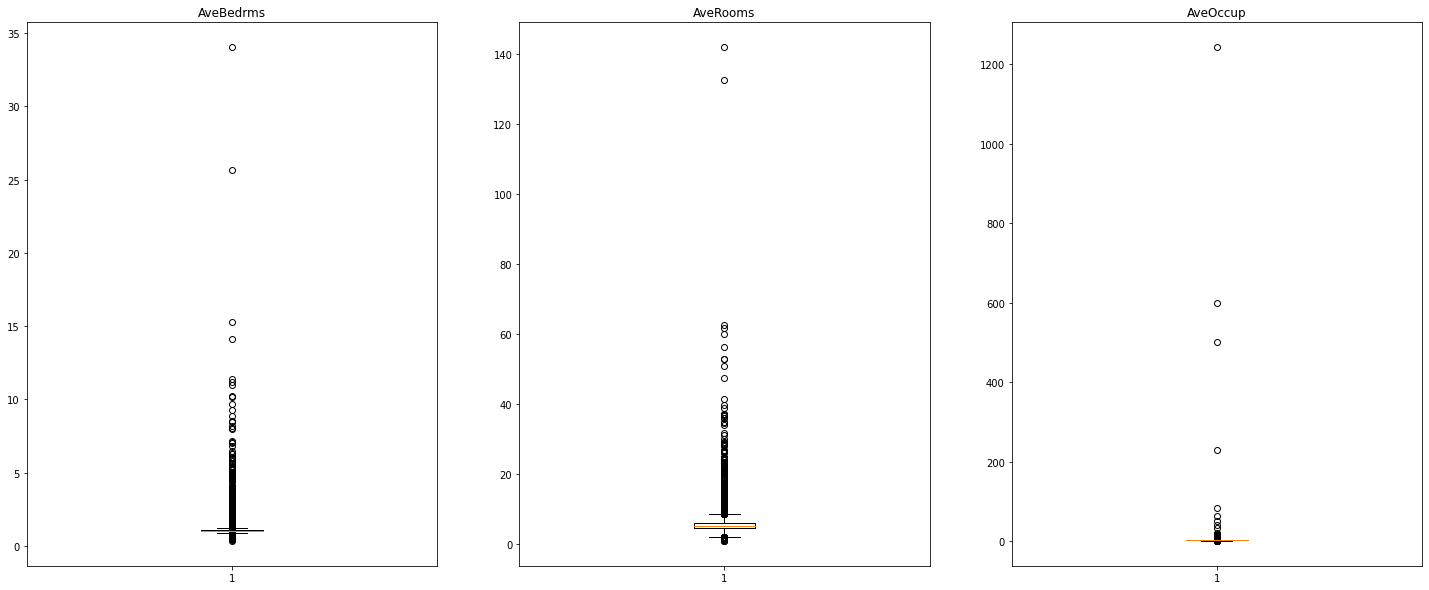

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (25,10))

ax1.boxplot(housing['AveBedrms'])
ax1.set_title('AveBedrms')

ax2.boxplot(housing['AveRooms'])
ax2.set_title('AveRooms')

ax3.boxplot(housing['AveOccup'])
ax3.set_title('AveOccup')
plt.show()

Looks like we have a lot of outliers. Let's remove all of them

We are going to remove them using the Z score by setting a threshold of 3 standard deviations, so any number that goes beyond that is going to be removed

In [7]:
from scipy import stats
#setting threshold
threshold = 3

#Getting Z scores
z_scores = np.abs(stats.zscore(housing))
#Matching z_scores greater than threshold
outlier = z_scores > threshold

#Applying mask
result = np.where(outlier == 1)

#Getting the indexes
idx = list(result[0])

#Droping outliers from DataFrame
housing.drop(idx,inplace = True)




In [8]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


We came out with 19794 instances. Now let's plot some box plots to see the difference

In [9]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000
mean,3.732421,28.971658,5.243471,1.068965,1344.441598,2.931222,35.636131,-119.583137,2.025858
std,1.604571,12.448220,1.221588,0.135362,811.791606,0.884634,2.137114,2.003830,1.107571
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.544400,19.000000,4.417435,1.005442,792.000000,2.426490,33.930000,-121.800000,1.184000
50%,3.500000,29.000000,5.185518,1.048193,1162.000000,2.816485,34.260000,-118.500000,1.781000
75%,4.661250,37.000000,5.970846,1.098284,1696.000000,3.284288,37.720000,-118.020000,2.600750
max,9.556100,52.000000,12.447368,2.514610,4819.000000,33.952941,41.950000,-114.550000,5.000010


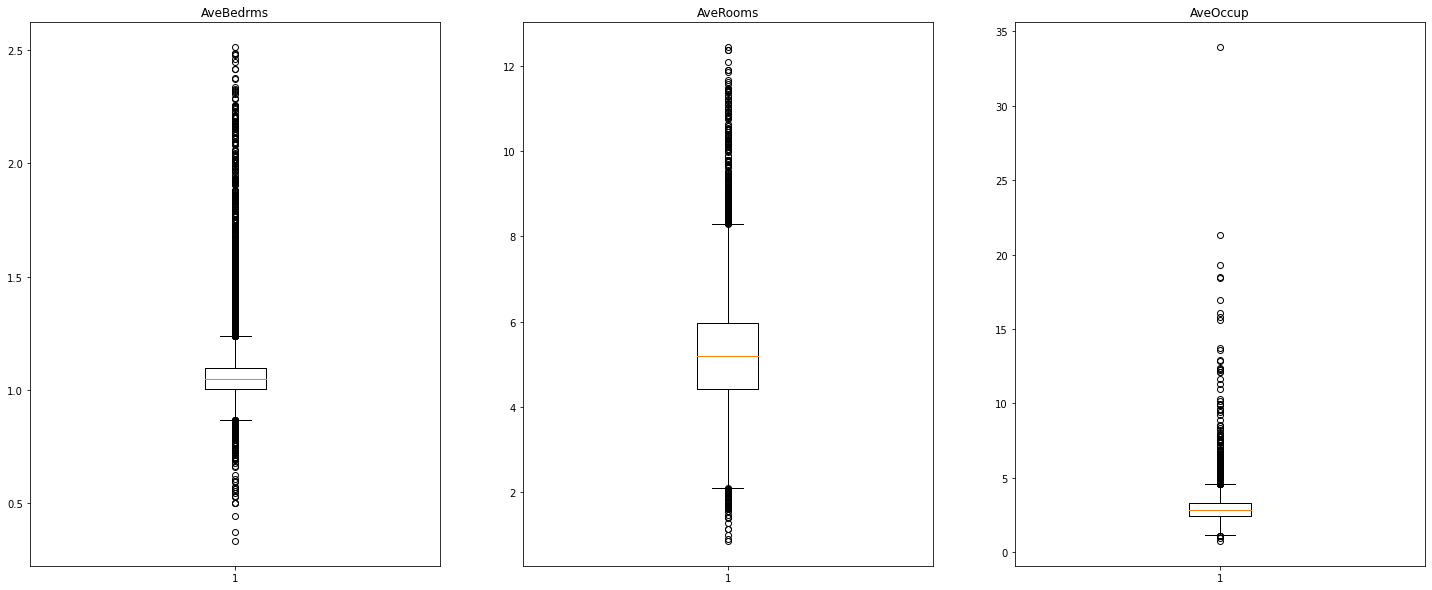

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (25,10))

ax1.boxplot(housing['AveBedrms'])
ax1.set_title('AveBedrms')

ax2.boxplot(housing['AveRooms'])
ax2.set_title('AveRooms')

ax3.boxplot(housing['AveOccup'])
ax3.set_title('AveOccup')

plt.show()

That is a little bit better. We still have some outliers but not it is not that critical. We will create a first model quickly and gain some insights to improve performance


Now we will prepare the data to enter the ML algorithm.



We need a few things before

1. Create training and test sets
2. Normalize the inputs 
3. Transform data into arrays
4. Evaluate the results using Mean absolute error




## Split dataset

In [11]:
y = housing['MedHouseVal']
housing.drop('MedHouseVal',axis = 1,inplace = True)


In [12]:
X = housing
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Splitting the dataset in 75% and 25%

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)


Now, lets normalize our data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
y_train.shape

(14845,)

In [18]:
x_train_scaled.shape

(14845, 8)

In python we need to reshape the arrays to avoid future bugs due to that comma at the end of the number

We want specific array shapes like (14845,1)

In [19]:
def reshape(y_train,y_test):
   
    y_train_reshaped = np.reshape(y_train,(y_train.shape[0],1))

    y_test_reshaped  = np.reshape(y_test,(y_test.shape[0],1))
    
    return y_train_reshaped ,y_test_reshaped

In [20]:
y_train, y_test = reshape(y_train,y_test)

In [21]:
x_train = x_train[:1000]
y_train = y_train[:1000]


In [22]:
# X_train_reshaped.shape,X_test_reshaped.shape,y_train_reshaped.shape,y_test_reshaped.shape

In [42]:
from SRC.LinearModels import Regression
custom_regression = Regression()

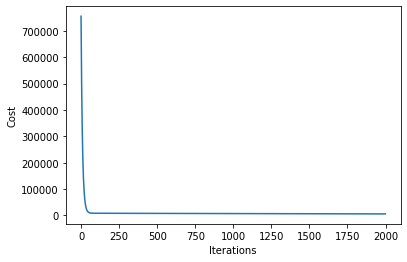

In [43]:
custom_regression.fit(x_train,y_train)

In [50]:
custom_regression.cost[1999]

5906.326328623393

Perfect! our arrays are ready

-----------------------------

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
#Create scikit learn model

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Now let's compare linear regression from scikit learn with our custom approach to see the difference

Compare both of them using MSE from sklearn

In [27]:
#Compute prediction in each model
pred_sklearn = model.predict(X_test_reshaped)
pred_custom = predict(X_test_reshaped,theta)

#Compute the error from each model
error_sklearn = mean_squared_error(y_test_reshaped,pred_sklearn)
custom_error = mean_squared_error(y_test_reshaped,pred_custom)

NameError: name 'X_test_reshaped' is not defined

In [ ]:
print('Error in test set from scikit-learn model:',error_sklearn)
print('Error in test from our custom model:',custom_error)

It works fine. Now let's try the model in the whole dataset and compare it again with sklearn

But this time we are going to compile everything in one class

In [ ]:
#as we have more features, we will double the number of iterations
custom_model = linear_regression(iterations = 1000,learning_rate = 0.01)

In [ ]:
#Normalize and convert into array
X_full = normalize(housing)
X_arr_full = np.array(X_full)
y_arr_full = np.array(y)

#Generate train and test sets
X_train_full,X_test_full,y_train_full,y_test_full = train_test_split(X_arr_full,y_arr_full,test_size = 0.2,random_state = 0)

In [ ]:
#Reshape data 

y_train_reshaped = np.reshape(y_train_full,(y_train_full.shape[0],1))
y_test_reshaped = np.reshape(y_test_full,(y_test_full.shape[0],1))

In [ ]:
#Train custom model
theta_full = custom_model.fit(X_train_full,y_train_reshaped)

In [ ]:
model.fit(X_train_full,y_train_reshaped)

In [ ]:
#Compute predictions
pred_sklearn = model.predict(X_test_full)
pred_custom = custom_model.predict(X_test_full,theta_full)

#Compute errors
error_sklearn = mean_squared_error(y_test_reshaped,pred_sklearn)
error_custom = mean_squared_error(y_test_reshaped,pred_custom)

In [ ]:
print('Error in test set from scikit-learn model:',error_sklearn)
print('Error in test from our custom model:',error_custom)

The errors are similar, so our model from scratch is doing a similar work than scikit-learn model

Clearly, they are not good models. Some further improvements are required